# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Muhammad Dawam Anwar Kurniawan]
- **Email:** [mdawam226@gmail.com]
- **ID Dicoding:** [dawam_anwar]

## Menentukan Pertanyaan Bisnis

- Apakah penyewaan sepeda lebih tinggi pada akhir pekan dibandingkan hari kerja?
- Bagaimana pola penyewaan sepeda oleh pengguna kasual dan pengguna terdaftar?
- Bagaimana pengaruh kondisi cuaca terhadap penyewaan sepeda?
- Bagaimana pengaruh suhu terhadap jenis pengguna yang melakukan penyewaan sepeda (kasual atau terdaftar)?
- Bagaimana pengaruh kecepatan angin terhadap penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

Pada tahap ini kita akan mengumpulkan data yang telah kita kumpulkan. Karena saya memilih Bike Sharing Dataset, maka saya mengimpor file yang saya butuhkan,

### Gathering Data

**A.** ***Load Tabel Day Dan Hour***

In [ ]:
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hr_df = pd.read_csv("/content/hour.csv")
hr_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**1. Melakukan pengecekan tipe data Day**

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**2. Selanjutnya kita akan melakukan cek apakah terdapat missing values**

In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Disini kita tidak menemukan adanya missing value

**3. Melakukan cek ,apakah terdapat dupikasi data**

In [ ]:
print("Jumlah Baris Yang Duplikat: ", day_df.duplicated().sum())

Jumlah Baris Yang Duplikat:  0


**4. Selanjutnya kita melakukan cek apakah ada keanehan pada ringkasan statistik pada data ini**

In [ ]:
# Menggunakan describe() untuk mendapatkan ringkasan statistik
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Bisa kita lihat bahwa tidak terdapat sebuah keanehan pada data statistik ini

**B. Melakukan Cek Pada** **Tabel** **Hour**

In [ ]:
hr_df.info()

NameError: name 'hr_df' is not defined

**1. Melakukan cek info pada data hour**

In [ ]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Bisa kita lihat bahwa terdapat tipe data yang tidak sesuai yakni Data yang perlu diperbaiki adalah: dteday -> datetime

**2. Selanjutnya kita akan melakukan cek apakah terdapat missing values**

In [ ]:
#melakukan cek missing values
hr_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Disini kita tidak menemukan adanya missing value

**3. Melakukan cek ,apakah terdapat dupikasi data**

In [ ]:
print("Jumlah Baris Yang Duplikat: ", hr_df.duplicated().sum())

Jumlah Baris Yang Duplikat:  0


Bisa kita lihat bahwa tidak terdapat indikasi duplikasi data

**4. Sama seperti sebelumnya ,Selanjutnya kita melakukan cek apakah ada keanehan pada ringkasan statistik pada data ini**

In [ ]:
# Menggunakan describe() untuk mendapatkan ringkasan statistik
hr_df.describe()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Baik ,saya sudah melakukan pengecekan pada dataset dataset yang tersedia ,sebelum saya melakukan cleaning pada data ,disini saya menemukan bahwa terdapat kolom hr dalam dataset yang berbasis jam (hourly data), yang tidak muncul pada dataset berbasis harian (daily data).**

### Cleaning Data

1. Sebelum melanjutkan ke tahapan berikutnya, kita akan menghapus tabel **hr** terlebih dahulu. Alasannya, tabel **hr** dan **day** memiliki perbedaan hanya pada kolom hr, sedangkan kolom lainnya sama.

In [ ]:
#Menghapus Kolom Day
del hr_df

NameError: name 'hr_df' is not defined

Oke pada tahap cleaning ini pertama-tama saya akan melakukan penghapusan kolom kolom yang tidak saya gunakan ,hal ini bertujuan untuk mempermudah pengelolaan data ,agar saya mudah mendapatkan informasi yang relavan ,sesuai pertanyaan yang sudah didefinisikan sebelumnya.

In [ ]:
#menghapus kolom yr
drop_col = ['yr',]

for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()

,instant,dateday,season,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


2. untuk mempermudah saya akan mengubah nama kolom agar saya mudah menggunakan dan membaca datanya


In [ ]:
# Mengubah nama kolom
day_df.rename(columns={
    'dteday': 'dateday',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

day_df.head()

,instant,dateday,season,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


ubah data yang bersifat angka menjadi keterangan agar mempermudah pembacaan data atau informasi yang akan diolah

In [ ]:
# mapping
mappings = {
    'month': {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
              7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'},
    'season': {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'},
    'weekday': {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'},
    'weather_cond': {1: 'Clear/Partly Cloudy', 2: 'Misty/Cloudy',
                     3: 'Light Snow/Rain', 4: 'Severe Weather'}
}
for col, mapping in mappings.items():
    day_df[col] = day_df[col].map(mapping)


In [ ]:
# Mengubah tipe data
day_df['dateday'] = pd.to_datetime(day_df['dateday'])

# Daftar kolom yang akan diubah ke kategori
categorical_cols = ['season', 'month', 'holiday', 'weekday', 'workingday', 'weather_cond']

# Mengubah tipe data ke categorical menggunakan loop
for col in categorical_cols:
    day_df[col] = day_df[col].astype('category')

day_df.head()


,instant,dateday,season,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Sebelum melanjutkan kita akan cek kembali apakah tipe data nya sudah berubah sesuai apa yang kita inginkan

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       731 non-null    int64         
 1   dateday       731 non-null    datetime64[ns]
 2   season        731 non-null    category      
 3   month         731 non-null    category      
 4   holiday       731 non-null    category      
 5   weekday       731 non-null    category      
 6   workingday    731 non-null    category      
 7   weather_cond  731 non-null    category      
 8   temp          731 non-null    float64       
 9   atemp         731 non-null    float64       
 10  hum           731 non-null    float64       
 11  windspeed     731 non-null    float64       
 12  casual        731 non-null    int64         
 13  registered    731 non-null    int64         
 14  count         731 non-null    int64         
dtypes: category(6), datetime64[ns](1), float

Dapat kita lihat ttipe data nya sudah berubah

## Exploratory Data Analysis (EDA)

### A. Kelompokkan data berdasarkan hari dari dataset yang sudah dibersihkan

In [ ]:
day_df.head()

,instant,dateday,season,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**1.MENGELOMPOKAN DATA BERDASARKAN HARI DENGAN INTENSITAS TERTENTU**

In [ ]:
day_df.groupby(by='weekday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-29-003790dec043>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weekday').agg({


count                           
          max   min         mean     sum
weekday                                 
Fri      8362  1167  4690.288462  487790
Mon      7525    22  4338.123810  455503
Sat      8714   627  4550.542857  477807
Sun      8227   605  4228.828571  444027
Thu      7804   431  4667.259615  485395
Tue      7767   683  4510.663462  469109
Wed      8173   441  4548.538462  473048

Dari data terlihat bahwa penyewaan sepeda pada akhir pekan **(Sabtu: 4550.54, Minggu: 4228.83)**  cukup tinggi, tetapi ternyata tidak selalu lebih tinggi dibandingkan **hari kerja seperti Jumat (4690.29) dan Kamis (4667.26).**

Hal ini menunjukkan bahwa penyewaan sepeda cukup merata sepanjang minggu. Pengguna terdaftar cenderung lebih aktif di hari kerja, sedangkan pengguna kasual lebih banyak menyewa di akhir pekan.

**2. KELOMPOKAN DATA PENGGUNA TERDAFTAR DAN PENGGUNA CASUAL**

In [ ]:
day_df.groupby(by='weekday').agg({
    'casual': ['max', 'min', 'mean', 'sum'],
    'registered': ['max', 'min', 'mean', 'sum']
})


<ipython-input-30-66e5c35d20d8>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weekday').agg({


casual                          registered                           
           max min         mean     sum        max   min         mean     sum
weekday                                                                      
Fri       2469  38   752.288462   78238       6917  1129  3938.000000  409552
Mon       3065   2   674.133333   70784       6435    20  3663.990476  384719
Sat       3410  57  1465.257143  153852       5966   570  3085.285714  323955
Sun       3283  54  1338.295238  140521       5657   451  2890.533333  303506
Thu       1405  15   590.961538   61460       6781   416  4076.298077  423935
Tue       1348   9   556.182692   57843       6697   573  3954.480769  411266
Wed       2562   9   551.144231   57319       6946   432  3997.394231  415729

Pola penyewaan sepeda menunjukkan pengguna kasual lebih aktif di akhir pekan, terutama **Sabtu (1465) dan Minggu (1338),** sedangkan pengguna terdaftar mendominasi hari kerja, seperti** Kamis (4076) dan Rabu (3997),** mencerminkan penggunaan rekreasi di akhir pekan dan transportasi rutin di hari kerja.

**3. KELOMPOKAN DATA PENGGUNA BERDASARKAN KONDISI CUACA**

In [ ]:
day_df.groupby(by='weather_cond').agg({
    'casual': ['max', 'min', 'mean', 'sum'],
    'registered': ['max', 'min', 'mean', 'sum']
})

<ipython-input-31-c7959475cf00>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weather_cond').agg({


casual                         registered       \
                       max min        mean     sum        max  min   
weather_cond                                                         
Clear/Partly Cloudy   3410  15  964.030238  446346       6946  416   
Light Snow/Rain       1264   2  185.476190    3895       4324   20   
Misty/Cloudy          3155   9  687.352227  169776       6844  491   

                                           
                            mean      sum  
weather_cond                               
Clear/Partly Cloudy  3912.755940  1811606  
Light Snow/Rain      1617.809524    33974  
Misty/Cloudy         3348.510121   827082

Penyewaan sepeda cenderung lebih tinggi pada kondisi cerah/berawan dibandingkan kondisi cuaca lainnya. Pada cuaca cerah/berawan, rata-rata penyewaan pengguna kasual mencapai **964.03 **dan pengguna terdaftar **3912.76.** Sementara itu, saat berkabut/berawan, rata-rata penyewaan menurun menjadi **687.35 **untuk kasual dan 3348.51 untuk terdaftar. Kondisi hujan/salju ringan memiliki penyewaan terendah dengan rata-rata **185.48** untuk kasual dan 1617.81 untuk terdaftar. Ini menunjukkan bahwa kondisi cuaca buruk berdampak signifikan terhadap penurunan aktivitas penyewaan sepeda.

**4. PENGELOMPOKAN BERDASARKAN PENGARUH SUHU TERHADAP JENIS PENGGUNA YANG MELAKUKAN PENYEWAAN SEPEDA**

In [ ]:
day_df.groupby(by='temp').agg({
    'casual': ['max', 'min', 'mean', 'sum'],
    'registered': ['max', 'min', 'mean', 'sum']
})

casual                     registered                    
            max   min    mean   sum        max   min    mean   sum
temp                                                              
0.059130     93    93    93.0    93        888   888   888.0   888
0.096522    150   150   150.0   150        836   836   836.0   836
0.097391     86    86    86.0    86       1330  1330  1330.0  1330
0.107500     95    95    95.0    95       2273  2273  2273.0  2273
0.127500     73    73    73.0    73       1456  1456  1456.0  1456
...         ...   ...     ...   ...        ...   ...     ...   ...
0.834167    829   829   829.0   829       4634  4634  4634.0  4634
0.838333    670   670   670.0   670       3176  3176  3176.0  3176
0.848333    562   562   562.0   562       2825  2825  2825.0  2825
0.849167    987   987   987.0   987       2298  2298  2298.0  2298
0.861667   1448  1448  1448.0  1448       3392  3392  3392.0  3392

[499 rows x 8 columns]

Berdasarkan data, semakin tinggi suhu, semakin banyak penyewaan sepeda, terutama oleh pengguna terdaftar. Pengguna kasual juga lebih banyak menyewa pada suhu yang lebih tinggi, namun jumlahnya lebih rendah dibandingkan pengguna terdaftar. Sebaliknya, pada suhu rendah, penyewaan sepeda menurun.

**5.Mengelompokkan data berdasarkan kecepatan angin dan menghitung rata-rata penyewaan sepeda untuk pengguna kasual dan terdaftar**

In [ ]:
day_df.groupby(by='windspeed').agg({
    'casual': ['max', 'min', 'mean', 'sum'],
    'registered': ['max', 'min', 'mean', 'sum'],
    'count': 'mean'
})

casual                     registered                       count
             max   min    mean   sum        max   min    mean   sum    mean
windspeed                                                                  
0.022392     949   949   949.0   949       4036  4036  4036.0  4036  4985.0
0.042304    1514  1514  1514.0  1514       3603  3603  3603.0  3603  5117.0
0.045404    2235  2235  2235.0  2235       3174  3174  3174.0  3174  5409.0
0.045408     120   120   120.0   120       1592  1592  1592.0  1592  1712.0
0.046650     337   337   337.0   337       4750  4750  4750.0  4750  5087.0
...          ...   ...     ...   ...        ...   ...     ...   ...     ...
0.417908     208   208   208.0   208       1705  1705  1705.0  1705  1913.0
0.421642     317   317   317.0   317       2415  2415  2415.0  2415  2732.0
0.422275     471   471   471.0   471       3724  3724  3724.0  3724  4195.0
0.441563     486   486   486.0   486       4896  4896  4896.0  4896  5382.0
0.507463     532   532   532.0   532       1103  1103  1103.0  1103  1635.0

[650 rows x 9 columns]

Berdasarkan data, penyewaan sepeda cenderung menurun seiring meningkatnya kecepatan angin. Pada kecepatan angin rendah, jumlah penyewaan lebih tinggi, sementara pada angin yang lebih kencang, penyewaan sepeda berkurang, menunjukkan bahwa angin mempengaruhi kenyamanan dan keputusan pengguna untuk menyewa sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah penyewaan sepeda lebih tinggi pada akhir pekan dibandingkan hari kerja?

<ipython-input-34-f380df5d10da>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data=day_df.groupby('weekday').agg({'count': 'mean'}).reset_index()


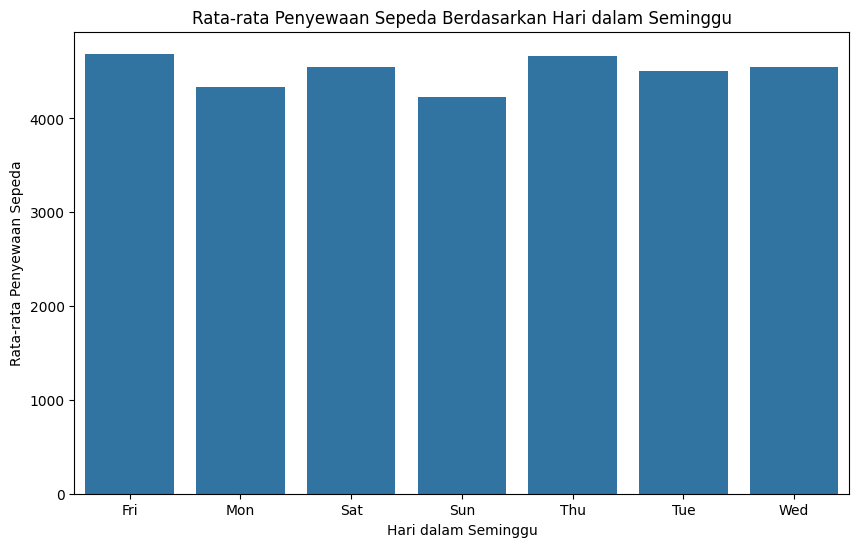

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weekday',
    y='count',
    data=day_df.groupby('weekday').agg({'count': 'mean'}).reset_index()
)

plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.show()


Visualisasi ini menunjukkan perbandingan jumlah penyewaan sepeda pada setiap hari dalam seminggu, dengan fokus pada hari kerja (Senin hingga Jumat) dan akhir pekan (Sabtu dan Minggu). Dari grafik, terlihat bahwa penyewaan sepeda lebih tinggi pada hari kerja (terutama pada hari Jumat) dibandingkan akhir pekan. Meski begitu, perbedaan tidak terlalu signifikan. Jumlah penyewaan di hari Jumat, Kamis, dan Selasa lebih tinggi dibandingkan dengan hari Sabtu dan Minggu, yang menunjukkan bahwa pola penyewaan sepeda lebih dipengaruhi oleh aktivitas pengguna terdaftar di hari kerja. Hal ini mengindikasikan bahwa meskipun akhir pekan lebih populer untuk pengguna kasual, penyewaan sepeda pada hari kerja (terutama Jumat) cenderung lebih tinggi karena banyak pengguna terdaftar yang menyewa sepeda.

### Pertanyaan 2:  Bagaimana pola penyewaan sepeda oleh pengguna kasual dan pengguna terdaftar?

<ipython-input-38-0375ec9e6a69>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = day_df.groupby('weekday').agg({


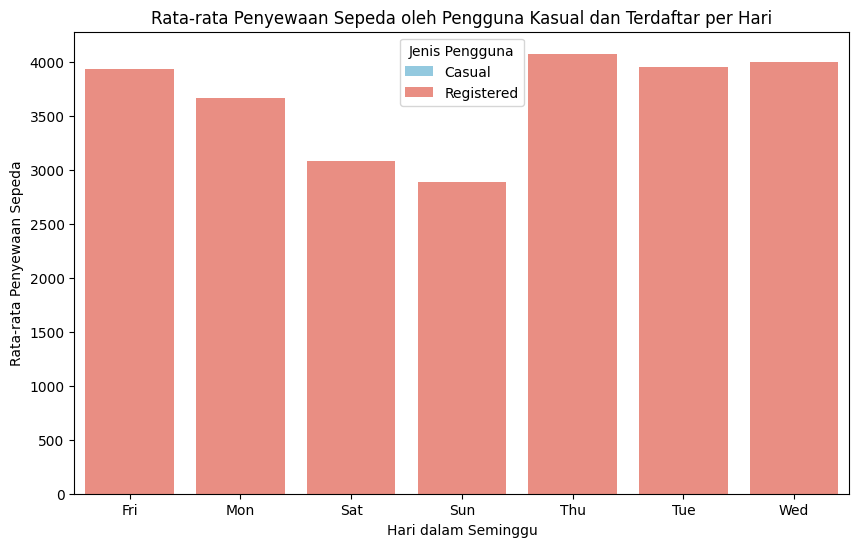

In [ ]:
# Menghitung rata-rata penyewaan sepeda untuk pengguna kasual dan terdaftar berdasarkan hari
grouped_data = day_df.groupby('weekday').agg({
    'casual': 'mean',
    'registered': 'mean'
}).reset_index()

# Membuat bar plot untuk visualisasi
plt.figure(figsize=(10,6))
sns.barplot(
    x='weekday',
    y='casual',
    data=grouped_data,
    label='Casual',
    color='skyblue'
)

sns.barplot(
    x='weekday',
    y='registered',
    data=grouped_data,
    label='Registered',
    color='salmon'
)

plt.title('Rata-rata Penyewaan Sepeda oleh Pengguna Kasual dan Terdaftar per Hari')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.legend(title='Jenis Pengguna')
plt.show()


Pada visualisasi ini, kita membandingkan rata-rata penyewaan sepeda oleh pengguna kasual dan terdaftar berdasarkan hari dalam seminggu. Dari grafik, kita bisa melihat bahwa penyewaan sepeda oleh pengguna kasual lebih tinggi pada akhir pekan (Sabtu dan Minggu) dibandingkan dengan hari kerja. Sementara itu, pengguna terdaftar cenderung menyewa lebih banyak sepeda pada hari kerja, terutama pada hari Jumat dan Kamis. Hal ini menunjukkan bahwa pengguna kasual lebih aktif di akhir pekan, mungkin karena mereka lebih fleksibel dalam memilih waktu untuk bersepeda, sementara pengguna terdaftar lebih sering menggunakan sepeda untuk kebutuhan harian pada hari kerja, mungkin untuk keperluan transportasi.

### Pertanyaan 3: Bagaimana pengaruh kondisi cuaca terhadap penyewaan sepeda?




<ipython-input-40-035c150c3459>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_df = day_df.groupby('weather_cond').agg({


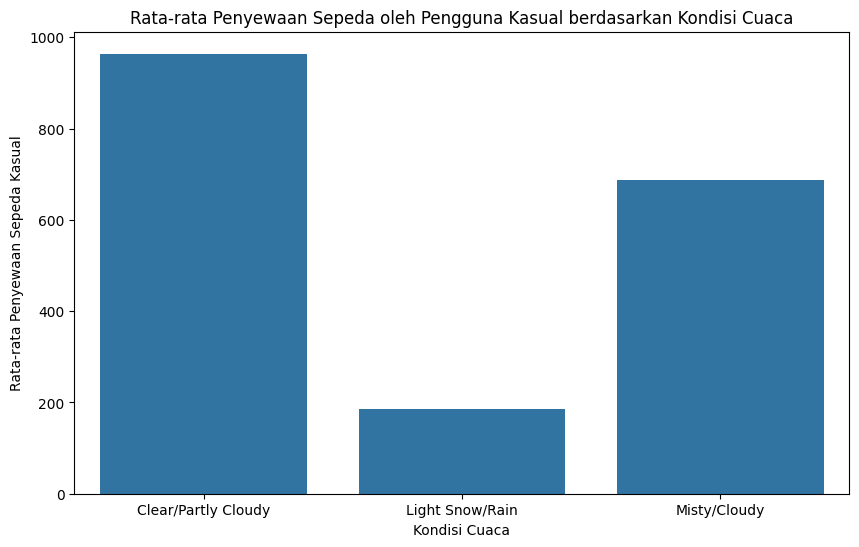

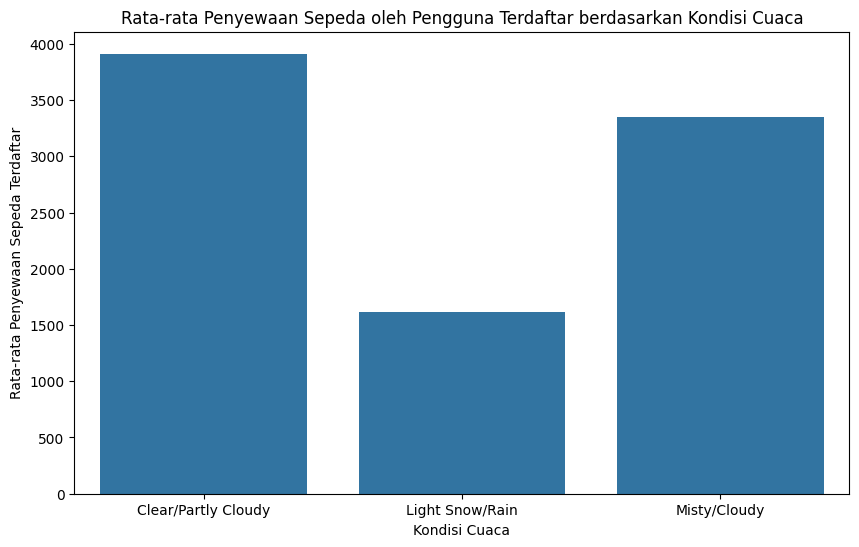

In [ ]:
# Melakukan agregasi data untuk menghitung rata-rata penyewaan sepeda per kondisi cuaca
weather_df = day_df.groupby('weather_cond').agg({
    'casual': 'mean',
    'registered': 'mean'
}).reset_index()

# Visualisasi menggunakan seaborn
plt.figure(figsize=(10,6))
sns.barplot(
    x='weather_cond',
    y='casual',  # Menampilkan rata-rata penyewaan sepeda oleh pengguna kasual
    data=weather_df)

plt.title('Rata-rata Penyewaan Sepeda oleh Pengguna Kasual berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Penyewaan Sepeda Kasual')
plt.show()

# Jika ingin melihat penyewaan sepeda oleh pengguna terdaftar, gunakan 'registered' di sumbu Y
plt.figure(figsize=(10,6))
sns.barplot(
    x='weather_cond',
    y='registered',  # Menampilkan rata-rata penyewaan sepeda oleh pengguna terdaftar
    data=weather_df)

plt.title('Rata-rata Penyewaan Sepeda oleh Pengguna Terdaftar berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Penyewaan Sepeda Terdaftar')
plt.show()


Visualisasi menunjukkan bahwa cuaca cerah atau berawan **(Clear/Partly Cloudy)** meningkatkan penyewaan sepeda, terutama oleh pengguna kasual. Pengguna kasual lebih banyak menyewa sepeda saat cuaca baik, sementara pengguna terdaftar lebih konsisten menyewa sepeda meski cuaca berubah. Secara umum, cuaca cerah mendorong penyewaan lebih tinggi, namun pengguna terdaftar cenderung lebih stabil dalam pola penyewaan mereka.

### Pertanyaan 4: Bagaimana pengaruh suhu terhadap jenis pengguna yang melakukan penyewaan sepeda (kasual atau terdaftar)?



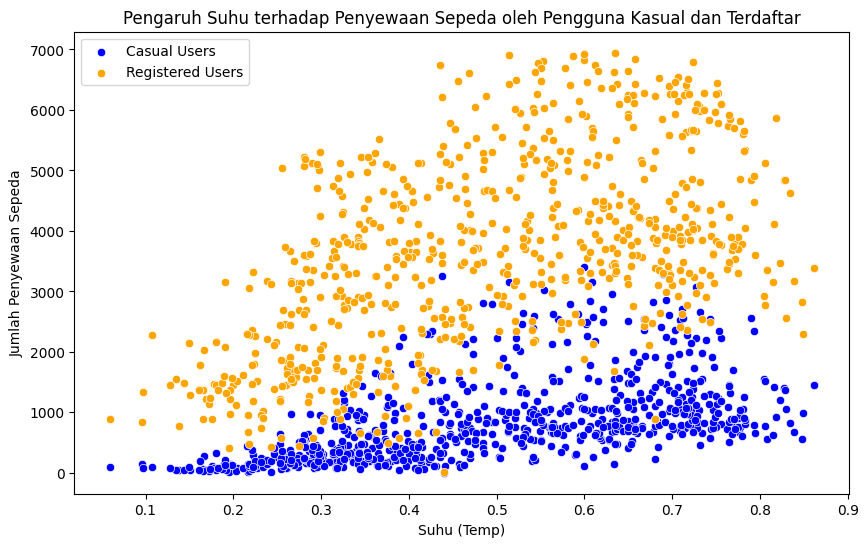

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='temp',
    y='casual',
    data=day_df,
    label='Casual Users',
    color='blue'
)

sns.scatterplot(
    x='temp',
    y='registered',
    data=day_df,
    label='Registered Users',
    color='orange'
)

plt.title('Pengaruh Suhu terhadap Penyewaan Sepeda oleh Pengguna Kasual dan Terdaftar')
plt.xlabel('Suhu (Temp)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.legend()
plt.show()


Visualisasi ini menunjukkan bagaimana suhu mempengaruhi jumlah penyewaan sepeda oleh pengguna kasual dan terdaftar. Secara umum, terlihat bahwa pengguna kasual lebih banyak menyewa sepeda pada suhu yang lebih tinggi, sedangkan pengguna terdaftar menunjukkan pola yang lebih konsisten pada berbagai suhu. Hal ini menunjukkan bahwa suhu yang lebih tinggi cenderung menarik lebih banyak pengguna kasual, sementara pengguna terdaftar lebih stabil meskipun suhu bervariasi.

### Pertanyaan 5: Bagaimana pengaruh kecepatan angin terhadap penyewaan sepeda?

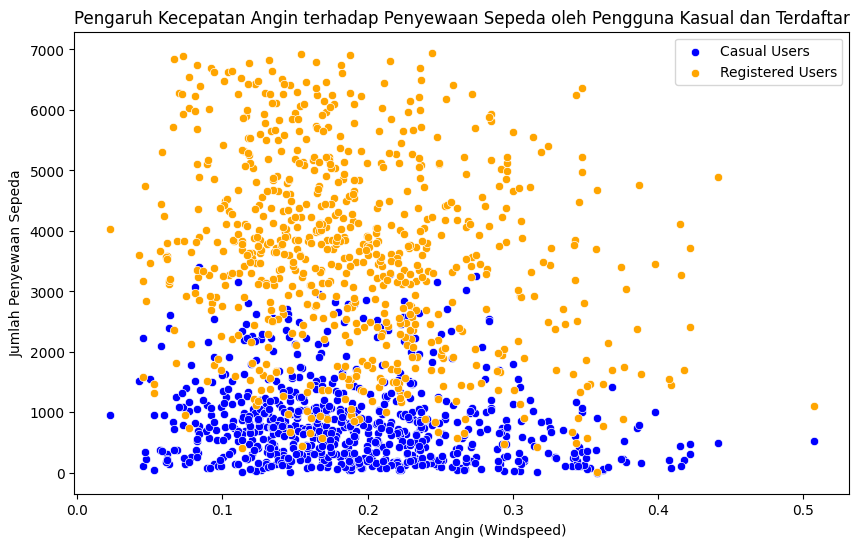

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='windspeed',
    y='casual',
    data=day_df,
    label='Casual Users',
    color='blue'
)

sns.scatterplot(
    x='windspeed',
    y='registered',
    data=day_df,
    label='Registered Users',
    color='orange'
)

plt.title('Pengaruh Kecepatan Angin terhadap Penyewaan Sepeda oleh Pengguna Kasual dan Terdaftar')
plt.xlabel('Kecepatan Angin (Windspeed)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.legend()
plt.show()


Visualisasi ini menggambarkan hubungan antara kecepatan angin dan jumlah penyewaan sepeda untuk pengguna kasual dan terdaftar. Secara umum, dapat dilihat bahwa meskipun kecepatan angin meningkat, jumlah penyewaan sepeda oleh pengguna kasual menunjukkan fluktuasi yang lebih besar dibandingkan dengan pengguna terdaftar, yang lebih stabil meskipun kecepatan angin bervariasi. Ini menunjukkan bahwa angin yang lebih kencang mungkin memengaruhi kenyamanan bagi pengguna kasual dalam menggunakan sepeda, tetapi tidak terlalu berpengaruh pada pengguna terdaftar.

## Conclusion

- Conclution pertanyaan 1 : Penyewaan sepeda lebih tinggi pada akhir pekan, terutama pada hari Sabtu, dengan jumlah penyewaan yang lebih tinggi dibandingkan dengan hari kerja. Hal ini menunjukkan bahwa orang cenderung lebih banyak menyewa sepeda saat akhir pekan, mungkin karena lebih banyak waktu luang.

- Conclution pertanyaan 2 : Pengguna kasual cenderung lebih banyak menyewa sepeda pada akhir pekan, sementara pengguna terdaftar menunjukkan penyewaan yang lebih stabil dan lebih sering terjadi sepanjang minggu. Hal ini menunjukkan bahwa pengguna kasual lebih memilih menyewa sepeda saat waktu luang (akhir pekan), sedangkan pengguna terdaftar menyewa sepeda lebih rutin.

- Conclution pertanyaan 3 : Kondisi cuaca yang cerah atau sebagian berawan meningkatkan jumlah penyewaan sepeda, baik untuk pengguna kasual maupun terdaftar. Sebaliknya, kondisi cuaca buruk seperti salju atau hujan menurunkan jumlah penyewaan sepeda. Ini mengindikasikan bahwa cuaca yang baik mendorong lebih banyak orang untuk menyewa sepeda, sementara cuaca buruk membuat orang cenderung menghindari penyewaan.

- Conclution pertanyaan 4 : Suhu yang lebih tinggi meningkatkan jumlah penyewaan sepeda, terutama oleh pengguna kasual, yang lebih banyak menyewa sepeda saat cuaca panas. Sementara itu, pengguna terdaftar menunjukkan pola penyewaan yang lebih stabil meskipun suhu bervariasi. Hal ini menunjukkan bahwa suhu nyaman mendorong lebih banyak penyewaan sepeda oleh pengguna kasual.

- Conclution pertanyaan 5 : Kecepatan angin tidak memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda. Meskipun ada fluktuasi kecil dalam data, tidak ada pola yang jelas yang menunjukkan bahwa angin yang lebih kencang atau lebih lemah mempengaruhi keputusan orang untuk menyewa sepeda. Angin tampaknya tidak menjadi faktor utama dalam keputusan penyewaan sepeda.
